In [1]:
# generally copied from Lucas's commit, but uses my functions
import numpy as np
import matplotlib.pyplot as plt
#import Project_6.lennard_jones_1 as lj
#from Project_6.LJ import LJ_force
from pot_force import all_force
from langevin import langevin



dimensions = 2
time_step = 0.001
damping = 0
beta = 0.01

In [70]:
def x_init_arange(n_particles):
    return np.arange(n_particles * dimensions).reshape(n_particles, dimensions)

def x_init_circular(n_particles):
    angle = 0
    x_init = np.zeros((n_particles, dimensions))
    for i in range(n_particles):
        x_init[i, :] = [radius * np.cos(angle), radius * np.sin(angle)]
        angle += 2 * np.pi / n_particles
    return x_init

def plot(n_particles, x_init_function):
    x_init = x_init_function(n_particles)
    v_init = np.arange(n_particles * dimensions).reshape(n_particles, dimensions)
    mass = np.ones(n_particles)
    
    x_sol, v_sol = langevin(all_force, n_steps, x_init, v_init,
                            mass, time_step * 10, damping, beta)

    r_sol = np.linalg.norm(x_sol, axis=2)
    r_sol = r_sol.reshape(-1)
    r_sol_mean = np.mean(r_sol)
    r_sol_max = np.ndarray.max(r_sol)
    r_sol_min = np.ndarray.min(r_sol)

    print('mean distance from centre:', r_sol_mean)
    print('minimum distance from centre:', r_sol_min)
    print('maximum distance from centre:', r_sol_max)
    

    plt.figure(1, figsize=(12, 5))
    plt.subplot(122)
    plt.title('trajectories')

    for i in range(n_particles):
        plt.plot(x_sol[:,i,0], x_sol[:,i,1])
    
    histogram = []
    iter_list = np.linspace(r_sol_min, r_sol_max, 40)
    for i in range(39):
        n = 0
        for j in range(len(r_sol)):
            if iter_list[i] < r_sol[j]:
                if r_sol[j] < iter_list[i+1]:
                    n += 1
        histogram.append(n)
    
    y_pos = np.arange(len(histogram))
    plt.subplot(121)
    plt.title('radial distribution')
    plt.bar(iter_list[1:], histogram)
    
    plt.show()
    

mean distance from centre: 2.0919890649277555
minimum distance from centre: 0.17233417787638217
maximum distance from centre: 4.415483853063562


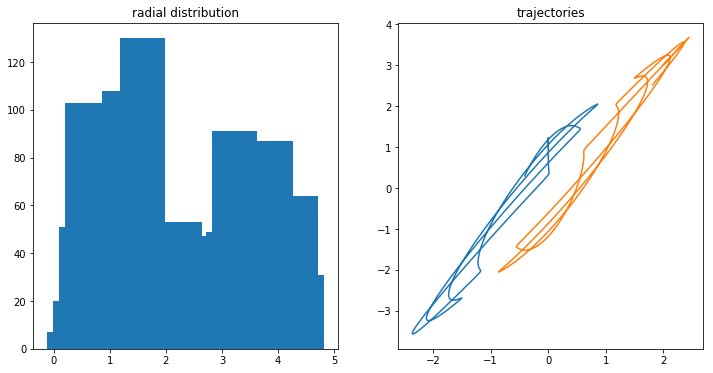

mean distance from centre: 3.333653186865547
minimum distance from centre: 0.0012173652590782688
maximum distance from centre: 7.841742578784009


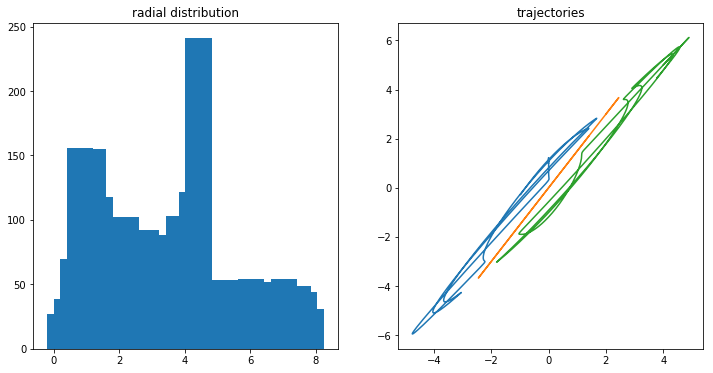

mean distance from centre: 4.576197265428637
minimum distance from centre: 0.09180868589616797
maximum distance from centre: 11.291087477019712


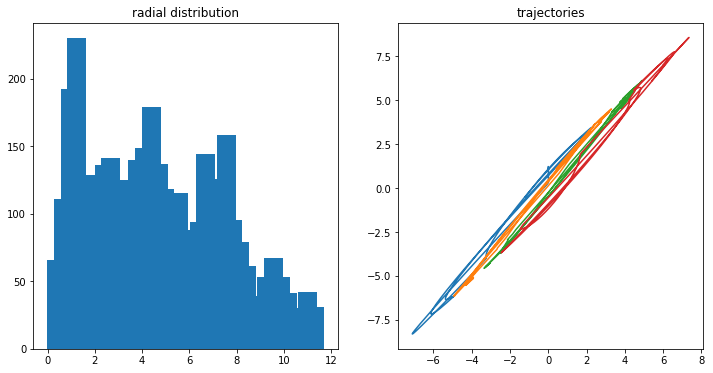

In [72]:
#plots trajectory for n = 2, 3, 4 partiles with initial position [n, n + 1] for n_steps 

n_steps = int(1E3)

for i in [2, 3, 4]:
    plot(i, x_init_arange)

mean distance from centre: 2.0378068093562547
minimum distance from centre: 0.1706400653263035
maximum distance from centre: 4.415495731768428


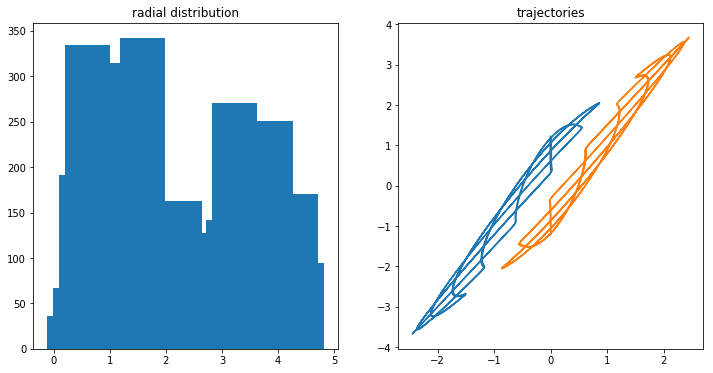

mean distance from centre: 3.2488213296958373
minimum distance from centre: 0.0012173652590782688
maximum distance from centre: 7.84670257532898


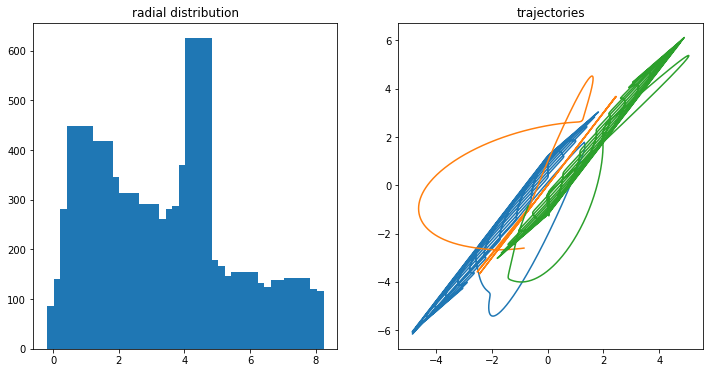

mean distance from centre: 4.558387174600432
minimum distance from centre: 0.042424177706149674
maximum distance from centre: 11.291087477019712


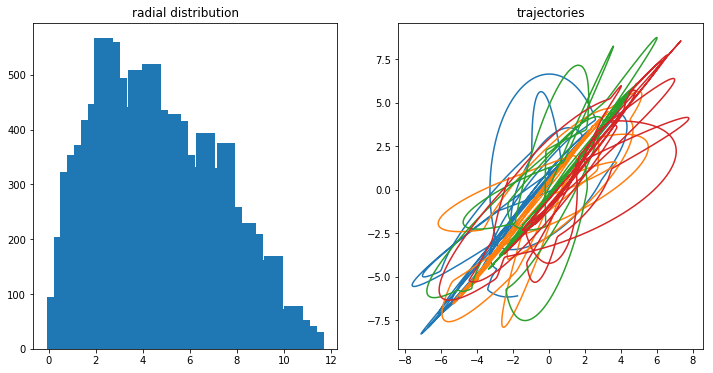

In [73]:
#plots trajectory for n = 2, 3, 4 partiles with initial position [n, n + 1] for n_steps 

n_steps = int(3E3)

for i in [2, 3, 4]:
    plot(i, x_init_arange)

mean distance from centre: 3.512903070893383
minimum distance from centre: 0.7253079852154751
maximum distance from centre: 5.220691005997441


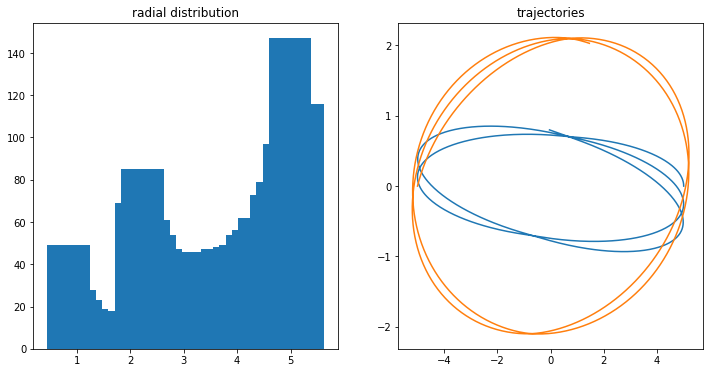

mean distance from centre: 3.645480298729636
minimum distance from centre: 0.017315866796979093
maximum distance from centre: 8.294483502812266


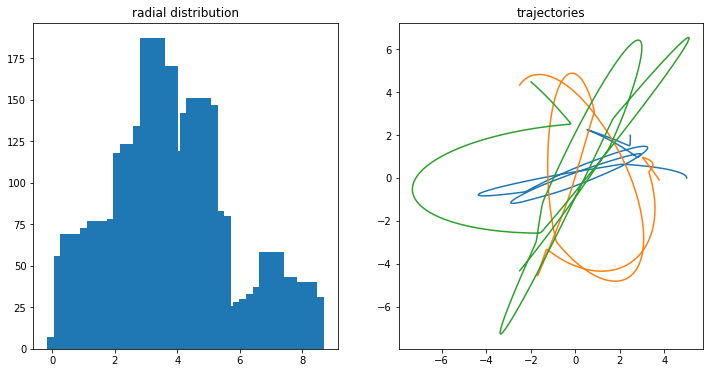

mean distance from centre: 4.54194887452723
minimum distance from centre: 0.03664490764056456
maximum distance from centre: 15.41121505247092


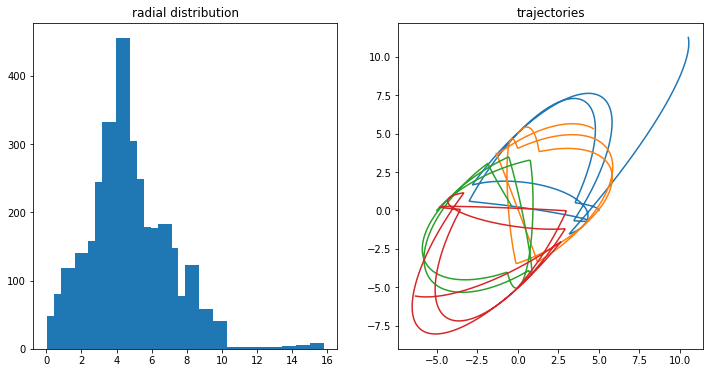

In [74]:
#plots trajectory for n = 2, 3, 4 particles evenly distributed on circle of given radius

n_steps = int(1E3)

radius = 5
for i in [2,3,4]:
    plot(i, x_init_circular)

mean distance from centre: 6.558393571226948
minimum distance from centre: 0.7114723054208216
maximum distance from centre: 10.10256259272583


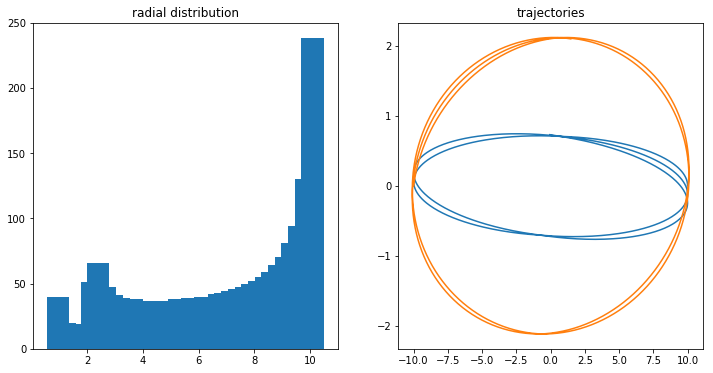

mean distance from centre: 6.681808226733713
minimum distance from centre: 0.4619180135347719
maximum distance from centre: 11.276790398681529


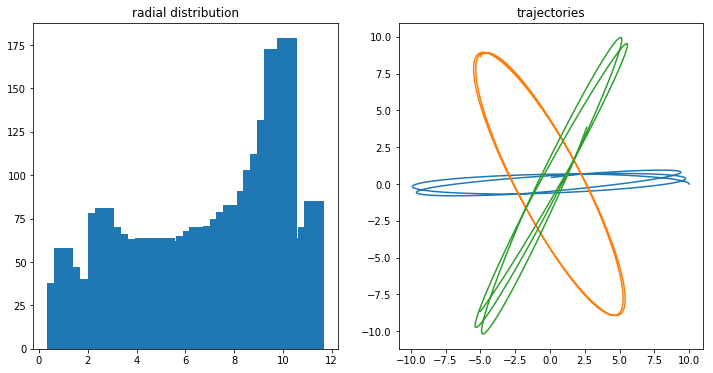

mean distance from centre: 4417.512164341568
minimum distance from centre: 0.6181902274014364
maximum distance from centre: 17171.190075095692


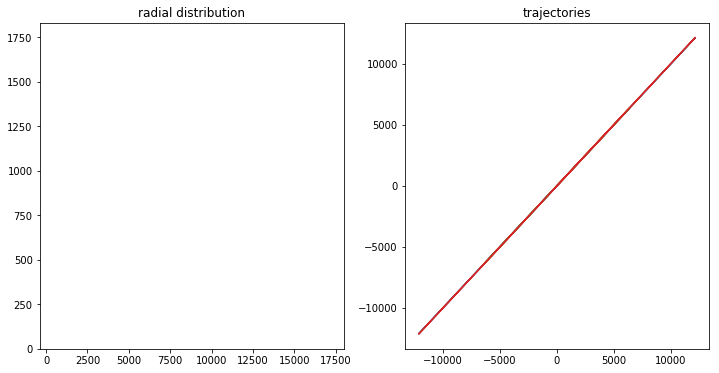

In [75]:
#plots trajectory for n = 2, 3, 4 particles evenly distributed on circle of given radius

n_steps = int(1E3)

radius = 10
for i in [2,3,4]:
    plot(i, x_init_circular)